/home/bon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[20/1000], loss: 26.907820
Epoch[40/1000], loss: 19.067677
Epoch[60/1000], loss: 13.526696
Epoch[80/1000], loss: 9.610640
Epoch[100/1000], loss: 6.842984
Epoch[120/1000], loss: 4.886956
Epoch[140/1000], loss: 3.504543
Epoch[160/1000], loss: 2.527529
Epoch[180/1000], loss: 1.837028
Epoch[200/1000], loss: 1.349019
Epoch[220/1000], loss: 1.004120
Epoch[240/1000], loss: 0.760363
Epoch[260/1000], loss: 0.588088
Epoch[280/1000], loss: 0.466332
Epoch[300/1000], loss: 0.380281
Epoch[320/1000], loss: 0.319463
Epoch[340/1000], loss: 0.276480
Epoch[360/1000], loss: 0.246100
Epoch[380/1000], loss: 0.224628
Epoch[400/1000], loss: 0.209452
Epoch[420/1000], loss: 0.198725
Epoch[440/1000], loss: 0.191142
Epoch[460/1000], loss: 0.185782
Epoch[480/1000], loss: 0.181993
Epoch[500/1000], loss: 0.179314
Epoch[520/1000], loss: 0.177419
Epoch[540/1000], loss: 0.176079
Epoch[560/1000], loss: 0.175130
Epoch[580/1000], loss: 0.174459
Epoch[600/1000], loss: 0.173983
Epoch[620/1000], loss: 0.173646
Epoch[640

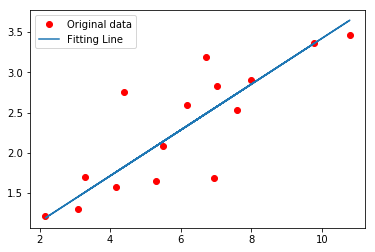

In [2]:
__author__ = 'SherlockLiao'

import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')